In [41]:
import numpy as np 
import matplotlib.pyplot as plt 
import Pk_library as PKL 
import MAS_library as MASL
import multiprocessing 
from numpy.linalg import norm
from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
text_size=26
fig_size_x=24
fig_size_y=14

In [59]:
# correlation function parameters
MAS     = 'TSC'
do_RSD = False
verbose = True
axis    = 0
h       = 0.67556
threads = multiprocessing.cpu_count()
Ngrid   = 128
BoxSize = 320

In [60]:
#Pylians doing CIC from snapshot
snapshot      = '/Users/farbod/Dropbox/Projects/Extended_Quintessence/gevolution-1.2-master/output/lcdm_snap001_cdm' #snapshot name
delta = np.zeros((Ngrid,Ngrid,Ngrid), dtype=np.float32)
delta = MASL.density_field_gadget(snapshot, [1], Ngrid, MAS, do_RSD, axis)		# 3D P(k) [1] for CDM
delta = delta/np.mean(delta)-1;
GPk = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)
Gk       = GPk.k3D
GPk0     = GPk.Pk[:,0] #monopole


Computing density field of particles [1]
2.09715199e+06 should be equal to
2.09715200e+06
Time taken = 0.16 seconds

Computing power spectrum of the field...
Time to complete loop = 0.10
Time taken = 0.11 seconds


In [61]:
gev_power = np.loadtxt("/Users/farbod/Dropbox/Projects/Extended_Quintessence/gevolution-1.2-master/output/lcdm_pk001_delta.dat")

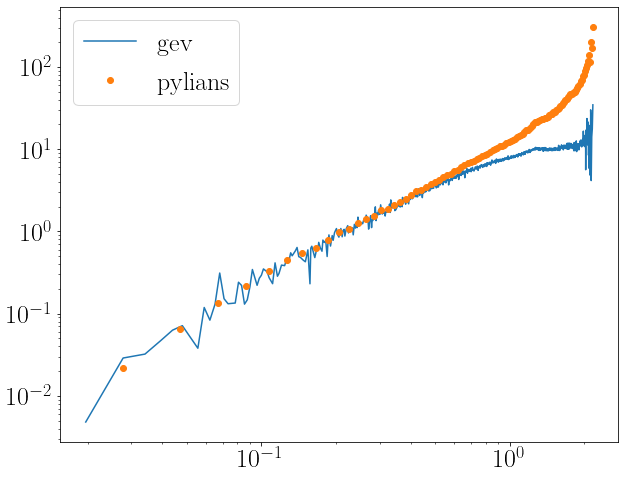

In [62]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

h = 0.7
matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))
plt.plot (gev_power[:,0],gev_power[:,1],label="gev")
plt.plot (Gk,GPk0* (Gk)**3/(2.0*np.pi**2),"o",label="pylians")
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [57]:
np.shape(Gk)

(110,)

In [58]:
np.shape(gev_power)

(960, 5)